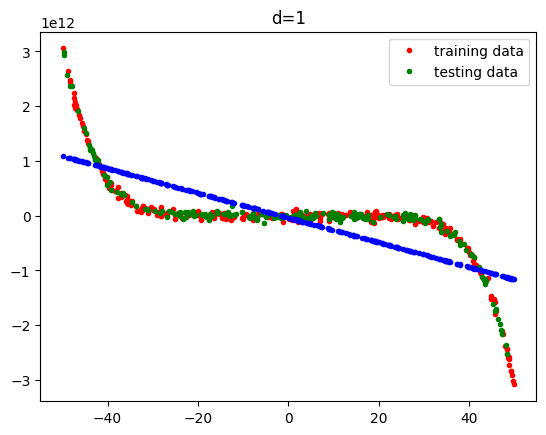

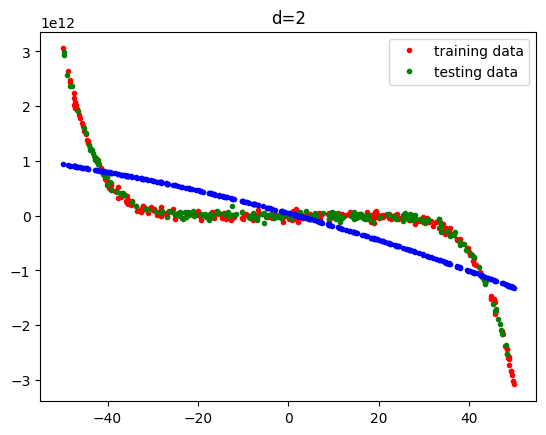

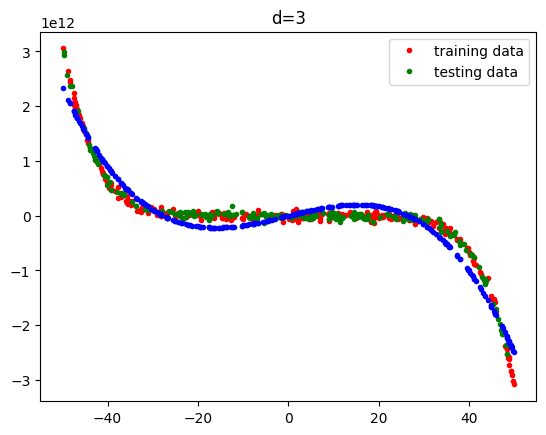

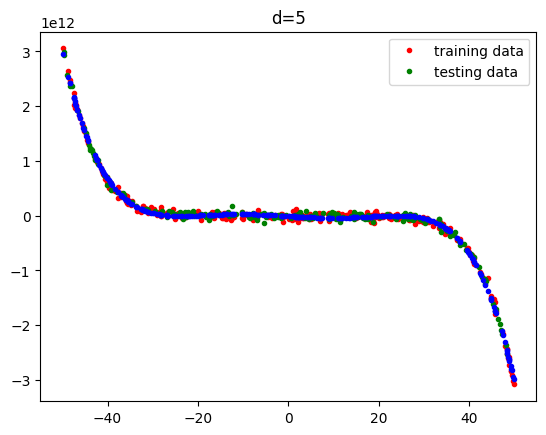

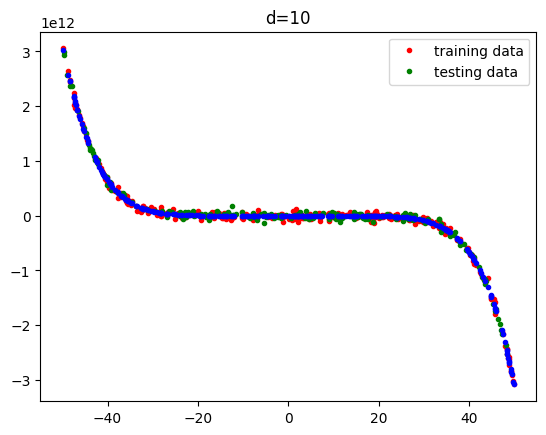

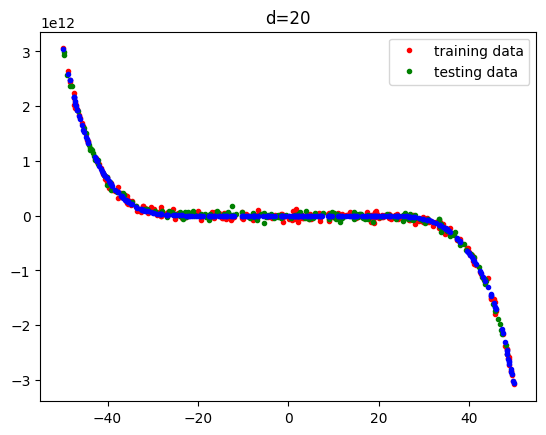

[(1.6485055196220592e+23, 1.2070855062084106e+23), (1.6219170977191933e+23, 1.2424150098207136e+23), (2.070195148814535e+22, 2.0364053085623582e+22), (2.054253551346994e+22, 2.0363319936324964e+22), (1.5302694123799925e+21, 1.417570895874114e+21), (1.529222539476739e+21, 1.4254543523663118e+21), (1.1362544701341957e+21, 1.1536217433216781e+21), (1.1283888173913426e+21, 1.1595518922018344e+21), (1.1387202718803556e+21, 1.1506806332326518e+21), (1.1356903882909389e+21, 1.1442692038925602e+21), (1.1372755052278533e+21, 1.1459039416275417e+21), (1.1372160472660877e+21, 1.1468399904541535e+21), (1.1350690896799865e+21, 1.14422307802873e+21), (1.1348921021440547e+21, 1.1451343746426812e+21), (1.1377486125652828e+21, 1.1492310527918126e+21), (1.1365062987520099e+21, 1.1484546974108993e+21), (1.1542504725700885e+21, 1.1717890050762177e+21), (1.1527385867763159e+21, 1.1695462546834331e+21), (1.2146453616347033e+21, 1.2372923678815171e+21), (1.213914380953426e+21, 1.2351801470952132e+21), (1.372

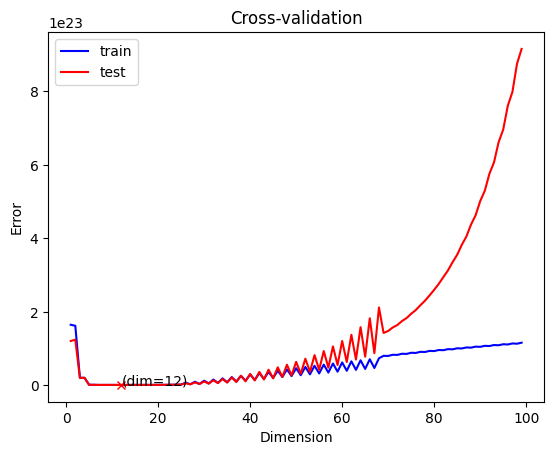

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv
from scipy.io import loadmat

def polyreg(x_train, y_train, Dim, x_test, y_test):
    Dim_pow = np.array(range(Dim+1))
    X_train = np.power(x_train, Dim_pow)
    # print(X_train.shape)
    # for i in range(Dim):
    model = np.linalg.pinv(X_train).dot(y_train)
    # model = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    # print(model.shape)
    train_err = (0.5/X_train.shape[0])*np.sum(np.power(y_train-X_train.dot(model),2))
    X_test = np.power(x_test, Dim_pow)
    if Dim in (1,2,3,5,10,20):
        # print(model[0,:])
        plt.figure(Dim)
        plt.plot(x_train, y_train, 'r.', label='training data')
        plt.plot(x_test, y_test, 'g.', label='testing data')
        plt.plot(x_train, X_train.dot(model), 'b.')
        plt.title('d='+str(Dim))
        plt.legend()
        plt.show()
    test_err = (0.5/X_test.shape[0])*np.sum(np.power(y_test-X_test.dot(model),2))
    return train_err, test_err


if __name__=="__main__":
    matdata = loadmat('problem1.mat')
    x = matdata['x']
    y = matdata['y']
    indices = np.random.permutation(x.shape[0])
    test_size = int(x.shape[0]*0.6)
    train_indices, test_indices = indices[:test_size], indices[test_size:]
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    max_dim = 100
    errs = [polyreg(x_train, y_train, i, x_test, y_test) for i in range(1,max_dim)]
    print(errs)
    train_errs = [err[0] for err in errs]
    test_errs  = [err[1] for err in errs]
    min_ind = np.argmin(test_errs)
    plt.figure(0)
    ltrain, = plt.plot(range(1,max_dim), train_errs,'b',label='train')
    ltest,  = plt.plot(range(1,max_dim), test_errs, 'r',label='test')
    plt.plot(min_ind, test_errs[min_ind], 'xr')
    plt.text(min_ind, test_errs[min_ind], "(dim={})".format(str(min_ind)))
    plt.xlabel('Dimension'); plt.ylabel('Error')
    plt.title('Cross-validation')
    plt.legend(handles=[ltrain, ltest])
    plt.show()